<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Week 3)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information: 

**Age:** Age of the employee 

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

## Table of Content

1. **[Decision tree](#dtree)**
2. **[Random forest](#rf)**

**Import the required libraries**

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [18]:
plt.rcParams['figure.figsize']=(15,10)

#### Load the csv file

In [126]:
df=pd.read_csv('emp_attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,No,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,No,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8


### Let's begin with some hands-on practice exercises

<a id="dtree"> </a>
## 1. Decision tree

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Write a code to detect the outliers in the dataset. Remove the outliers using IQR method, if present.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

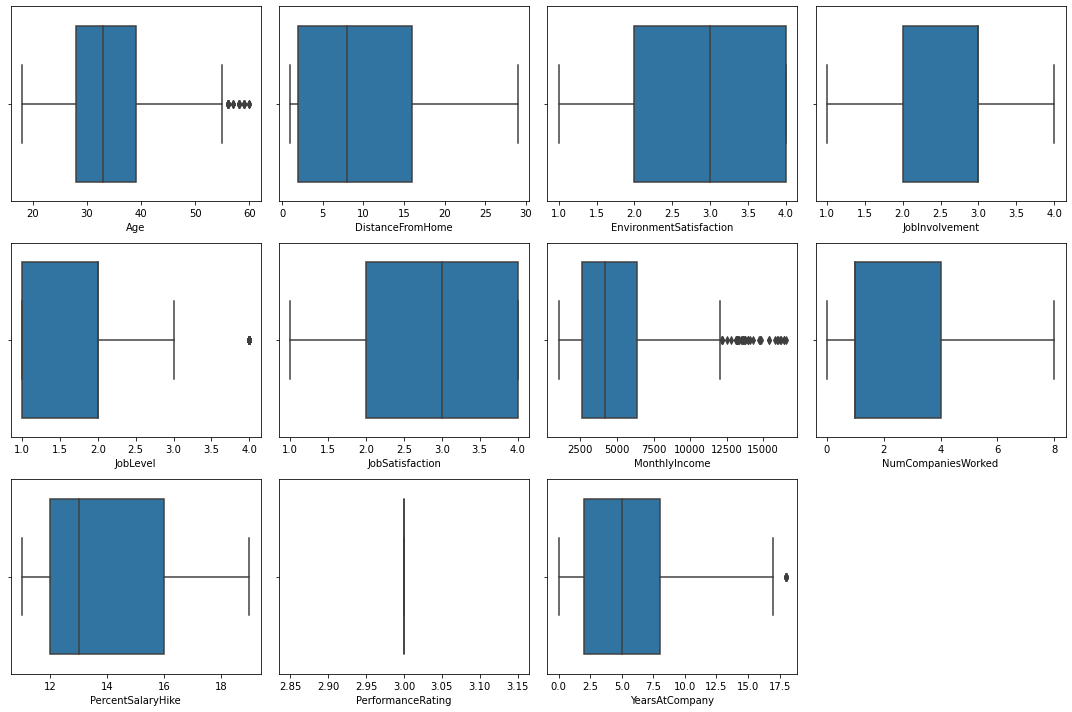

In [20]:
n=1
for i in df.select_dtypes('number'):
    plt.subplot(3,4,n)
    sns.boxplot(df[i])
    n+=1
plt.tight_layout()
plt.show()

In [127]:
q1= df.quantile(0.25)
q3 =df.quantile(0.75)
iqr =q3-q1

ll = q1-1.5*iqr
ul = q3+1.5*iqr

df_trimmed = df[~((df<ll)|(df>ul)).any(axis =1)]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a model to predict whether or not an employee will leave the company based on employee's environment satisfaction and monthly income. Calculate the accuracy for the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [128]:
df=df_trimmed.copy()
df.Attrition=df.Attrition.map({'Yes':1,'No':0})
df.BusinessTravel=df.BusinessTravel.map({'Non-Travel':0,'Travel_Rarely':1,'Travel_Frequently':2})
df.EducationField=df.EducationField.map(dict(df.EducationField.value_counts()/len(df)))
df.JobRole=df.JobRole.map(dict(df.JobRole.value_counts()/len(df)))
df.OverTime=df.OverTime.map({'Yes':1,'No':0})
df=pd.get_dummies(df,prefix_sep=' ',drop_first=True)
df.head()


,Age,Attrition,BusinessTravel,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany,Department Research & Development,Department Sales,Gender Male
0,33,1,2,3,0.386685,1,3,1,0.217888,1,3348,1,1,11,3,10,1,0,1
1,32,1,1,4,0.295225,4,1,3,0.248823,4,10400,1,0,11,3,14,0,1,1
2,40,1,1,9,0.386685,4,3,1,0.211836,1,2018,3,0,14,3,5,1,0,1
3,42,0,1,7,0.295225,2,4,2,0.217888,2,2372,6,1,16,3,1,1,0,0
4,43,0,2,27,0.386685,3,3,3,0.084734,1,10820,8,0,11,3,8,1,0,0


In [129]:
x=df[['EnvironmentSatisfaction','MonthlyIncome']]
y=df.Attrition
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=1)
d=DecisionTreeClassifier(random_state=1).fit(xtrain,ytrain)
p=d.predict(xtest)
print('Accuracy =',accuracy_score(ytest,p))

Accuracy = 0.8612975391498882


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Build a full model to predict if an employee will leave the company. Find three features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [131]:
X=df.drop('Attrition',axis=1)
y=df.Attrition
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)

d= DecisionTreeClassifier(random_state=1).fit(X_train,y_train)
p=d.predict(X_test)
print('Accuracy =',accuracy_score(y_test,p))

Accuracy = 0.87248322147651


In [133]:
pd.DataFrame({'Features': X_train.columns, 'Importance': d.feature_importances_}).sort_values(by='Importance',ascending=False)[:3]

,Features,Importance
0,Age,0.162933
9,MonthlyIncome,0.135817
14,YearsAtCompany,0.125268


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4.  Find the area under the receiver operating characteristic curve for full model built in question 3. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [134]:
p=d.predict(X_test)
roc_auc_score(y_test,p)

0.8819357445948676

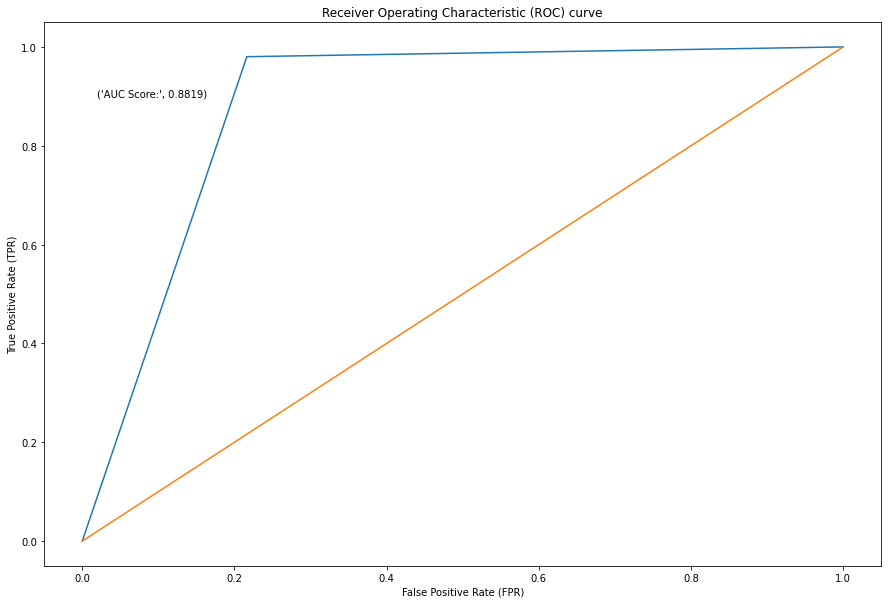

In [136]:
def plot_roc_curve(model,X,y):
    y_pred=model.predict_proba(X)[:,1]
    fpr, tpr ,_= roc_curve(y_test,p)
    plt.plot(fpr, tpr )
    plt.plot([0, 1], [0, 1])
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred),4)))
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) curve')
    plt.show()
    
plot_roc_curve(d,X_test,p)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Plot a confusion matrix for the full model built in Q3.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

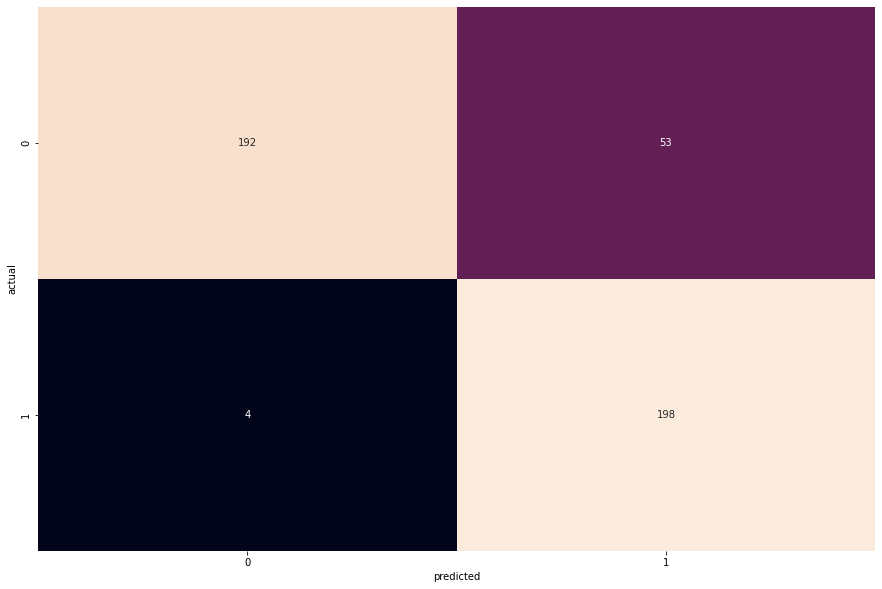

In [138]:
c=confusion_matrix(y_test,p)
sns.heatmap(c,annot=True,fmt='',cbar=False)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Calculate the specificity, sensitivity, % of misclassified and correctly classified observations. What can you say about the model by looking at the sensitivity and specificity values? Is this a good model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [139]:
tn,fp,fn,tp=c[0,0],c[0,1],c[1,0],c[1,1]

print('Specificity=',round(tn/(tn+fp),2))
print('Sensitivity=',round(fp/(fp+tn),2))
print('% of misclassified observation=',round(((fn+fp)/(tn+fp+fn+tp))*100,2))
print('% of correctly classified observations=',round(((tn+tp)/(tn+fp+fn+tp))*100,2))

Specificity= 0.78
Sensitivity= 0.22
% of misclassified observation= 12.75
% of correctly classified observations= 87.25


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build and plot a decision tree with maximum 5 terminal nodes.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

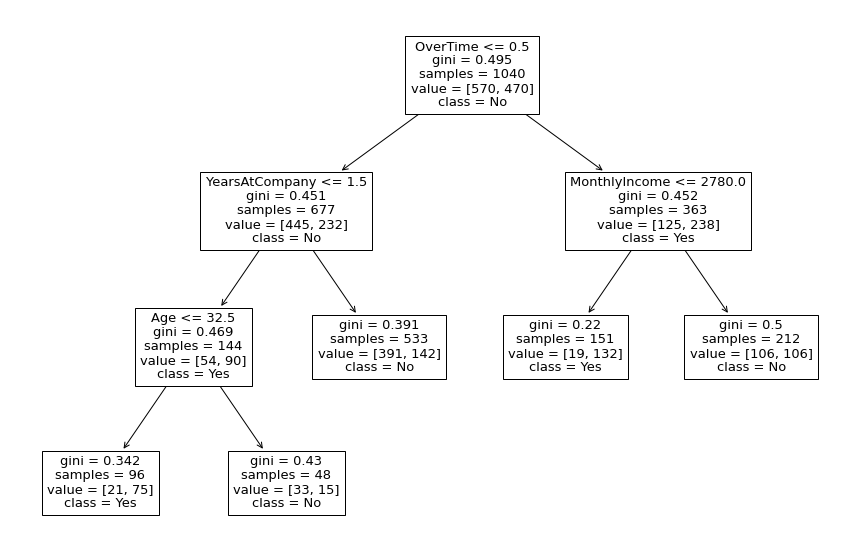

In [141]:
from sklearn import tree
X=df.drop('Attrition',axis=1)
y=df.Attrition
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)
d= DecisionTreeClassifier(random_state=1,max_leaf_nodes=5).fit(X_train,y_train)
tree.plot_tree(d,feature_names=X.columns,class_names=['No','Yes'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a Decision Tree model with the predefined parameters and find the average accuracy by performing the 10 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [142]:
X = df.drop('Attrition',axis=1)
y = df['Attrition']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)
score=list()
score = cross_val_score(DecisionTreeClassifier(random_state=1),X,y,cv=10,scoring= 'accuracy')
print(f'Accuracy:{round(np.mean(score),5)}')

Accuracy:0.90783


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. For a decision tree model, find the best value of hyperparameters "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the values as:
        
     criterion = ['entropy', 'gini'],
     max_depth = range(2, 10),
     min_samples_split = range(2,10)

In [143]:
X = df.drop('Attrition',axis=1)
y = df.Attrition
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)
pg={'criterion':['entropy','gini'],'max_depth':range(2,10),'min_samples_split':range(2,10)}
g=GridSearchCV(DecisionTreeClassifier(random_state=1),pg,cv=10).fit(X_train,y_train)
g.best_params_

{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 2}

In [144]:
X_train.shape

(1040, 18)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>10. Build a decision tree model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [145]:
# type your code here
dt=DecisionTreeClassifier(random_state=1,
                           criterion=g.best_params_.get('criterion'),
                           max_depth=g.best_params_.get('max_depth'),
                           min_samples_split=g.best_params_.get('min_samples_split'))

In [146]:
cross_val_score(dt,X_train,y_train,cv=10,scoring='roc_auc').mean()

0.8783314669652856

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Build 5 decision trees each with 20 random features. Also predict the attrition for test set for each model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [147]:
f=df.drop('Attrition',axis=1).columns
seed=1
pdict=dict()
for i in range(1,6):
    X=df[random.choices(f,k=20)]
    y=df.Attrition
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)
    d= DecisionTreeClassifier(random_state=1).fit(X_train,y_train)
    p=d.predict(X_test)
    pdict[f'prediction_{i}']=p

In [148]:
pdf=pd.DataFrame(pdict)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Create a new dataframe "model_predictions_df" by appending each prediction made in question 8. There will be 5 columns in the dataframe for each prediction using the decision tree models built in above question.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [149]:
model_predictions_df=pd.DataFrame(pdict)
model_predictions_df.head()

,prediction_1,prediction_2,prediction_3,prediction_4,prediction_5
0,1,1,1,1,1
1,1,1,0,0,0
2,0,1,0,0,1
3,1,1,1,1,1
4,0,0,0,0,1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a new column "Voted_Result" in the dataframe "model_predictions_df" that contains the maximum occuring value (mode) of the 5 columns in the dataframe (row-wise).<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [150]:
model_predictions_df['Voted_Result']=model_predictions_df.mode(1)
model_predictions_df.head()

,prediction_1,prediction_2,prediction_3,prediction_4,prediction_5,Voted_Result
0,1,1,1,1,1,1
1,1,1,0,0,0,0
2,0,1,0,0,1,0
3,1,1,1,1,1,1
4,0,0,0,0,1,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Consider the values of "Voted_Result" as our new predictions and store its values in a variable "new_y_pred" and find the accuracy and the roc-auc score using new_y_pred.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [151]:
new_y_pred=model_predictions_df.Voted_Result
print('Accuracy=',accuracy_score(y_test,new_y_pred),'\nAUC=',roc_auc_score(y_test,new_y_pred))

Accuracy= 0.9217002237136466 
AUC= 0.9242271165892099


<a id="rf"> </a>
## 2. Random Forest

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a random forest full model to predict if an employee will leave the company or not and generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [152]:
X=df.drop('Attrition',axis=1)
y=df.Attrition
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=10)

rf= RandomForestClassifier(random_state=1,n_estimators=100).fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       245
           1       0.91      0.95      0.92       202

    accuracy                           0.93       447
   macro avg       0.93      0.93      0.93       447
weighted avg       0.93      0.93      0.93       447



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. For a random forest model, find the best value of hyperparameters "n_estimators", "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    criterion = ['entropy', 'gini'],
    n_estimators = [90, 100, 150, 200],
    max_depth = [10, 15, 20],
    min_samples_split = [2, 5, 8]

In [154]:
X=df.drop('Attrition',axis=1)
y=df.Attrition
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=10)

parameters={'criterion':['entropy','gini'],
           'n_estimators':[90,100,150,200],
           'max_depth':[10,15,20],
           'min_samples_split':[2,5,8]}
rf_grid=GridSearchCV(RandomForestClassifier(random_state=1),param_grid=parameters,scoring='accuracy')
rf_grid_model=rf_grid.fit(X_train,y_train)
rf_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_split': 2,
 'n_estimators': 150}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Build a random forest model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [155]:
rf=RandomForestClassifier(random_state=1,
                           criterion=rf_grid_model.best_params_.get('criterion'),
                          n_estimators=rf_grid_model.best_params_.get('n_estimators'),
                           max_depth=rf_grid_model.best_params_.get('max_depth'),
                           min_samples_split=rf_grid_model.best_params_.get('min_samples_split'))

In [156]:
score=cross_val_score(rf,X_train,y_train,cv=10,scoring='roc_auc').mean()
print(f'roc_auc_score:{round(score,5)}')

roc_auc_score:0.9869


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Using the tuned random forest model, find the features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [157]:
rf_model=rf.fit(X_train,y_train)
pd.DataFrame({'Features': X_train.columns, 'Importance': rf_model.feature_importances_}).sort_values(by='Importance',ascending=False)[:3]

,Features,Importance
9,MonthlyIncome,0.143379
0,Age,0.123726
14,YearsAtCompany,0.095118


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Build a random forest model using the top 10 most important features.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [158]:
t=pd.Series(rf_model.feature_importances_,X.columns).nlargest(10)
X=df[t.index]
y=df.Attrition
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=10)
rl9=RandomForestClassifier(random_state=1).fit(X_train,y_train)
rl9

RandomForestClassifier(random_state=1)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Plot a confusion matrix and area under the receiver operating characteristic curve for the model built in question 19. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

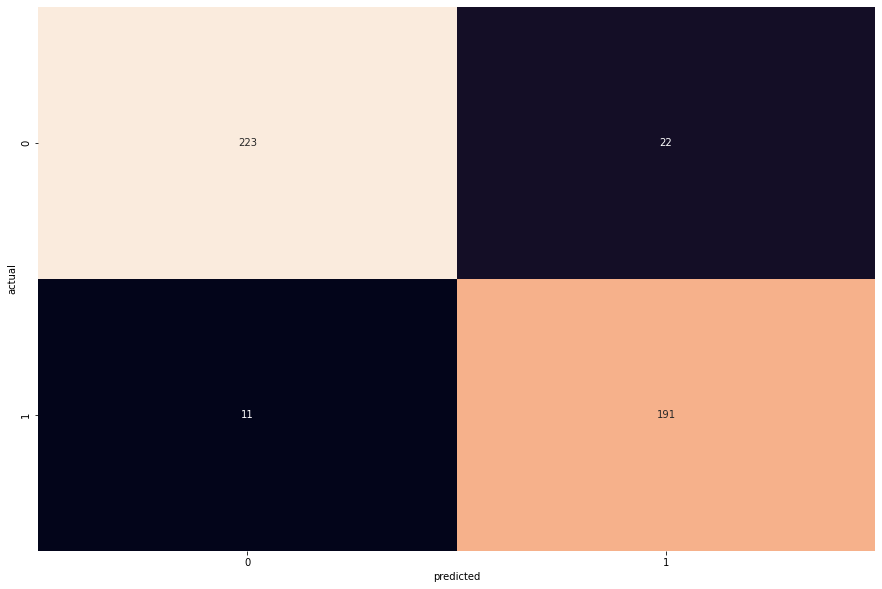

In [159]:
p=rl9.predict(X_test)
c=confusion_matrix(y_test,p)
sns.heatmap(c,annot=True,fmt='',cbar=False)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

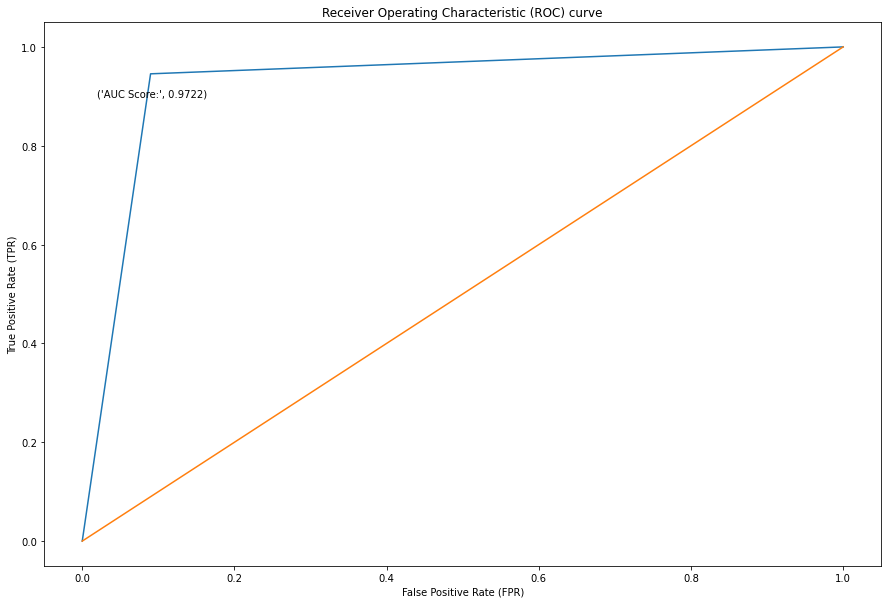

In [160]:
plot_roc_curve(rl9,X_test,p)